<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Деление на выборки</a></span><ul class="toc-item"><li><span><a href="#Обучающая-и-тестовая-выборки" data-toc-modified-id="Обучающая-и-тестовая-выборки-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обучающая и тестовая выборки</a></span></li><li><span><a href="#Признаки-и-целевой-признак" data-toc-modified-id="Признаки-и-целевой-признак-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Признаки и целевой признак</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импортируем библиотеки и модули, которые потребуются для выполнения проекта.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

[nltk_data] Downloading package wordnet to /Users/oksana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/oksana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oksana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка и обзор данных

Загрузим и изучим данные. Выведем на экран первые пять строк и информацию о датасете.

In [2]:
try:
    data = pd.read_csv('datasets/toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [3]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В датасете 159292 строки, пропусков нет. Есть лишний столбец `'Unnamed: 0'`, который, по всей видимости, не несет никакой существенной информации (возможно, результат сброса индекса). Удалим этот столбец.

In [5]:
data.drop(columns=data.columns[0], axis=1 , inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [7]:
data.tail()

,text,toxic
159287,""":::::And for the second time of asking, when ...",0
159288,You should be ashamed of yourself \n\nThat is ...,0
159289,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,And it looks like it was actually you who put ...,0
159291,"""\nAnd ... I really don't think you understand...",0


Лишний столбец удален. 

Посмотрим на распределение значений целевого признака.

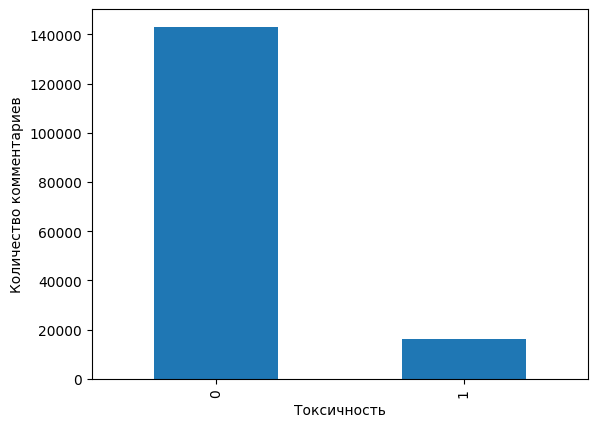

In [8]:
data['toxic'].value_counts().plot(kind='bar', xlabel='Токсичность', 
                                  ylabel='Количество комментариев');

Определим долю токсичных комментариев.

In [9]:
data['toxic'].value_counts()[1] / data['toxic'].value_counts().sum()

0.10161213369158527

Можно наблюдать дисбаланс классов. Токсичные комментарии составляют всего около 10% от общего числа комментариев. 

### Лемматизация

Напишем функцию, которая оставит в анализируемых текстах только слова на латинице и вернет лемматизированный текст.

In [10]:
def nltk_lemmatize(text, wnl=WordNetLemmatizer()):    
    doc = nltk.pos_tag(re.sub("[^a-zA-Z]", " ", text).split())
    tag_dict = {"R":"r", "V":"v", "J":"r"}
    lemmas = [wnl.lemmatize(w, tag_dict.get(p[0], 'n')) for w, p in doc]
    return " ".join(lemmas)

Добавим в таблицу столбец `'lemm_text'`, содержащий очищенный и лемматизированный текст.

In [11]:
data['lemm_text'] = data['text'].apply(nltk_lemmatize)

In [12]:
data.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,D aww He match this background colour I m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,Hey man I m really not try to edit war It s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,More I can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,You sir be my hero Any chance you remember wha...


**Выводы по шагу 1**
1. Данные загружены и изучены, удален лишний столбец.
2. Проанализировано соотношение значений в столбце `'toxic'`, обнаружен значительный дисбаланс классов.
3. Проведена лемматизация и очистка текстов, результаты сохранены в столбце `'lemm_text'`

## Обучение

### Деление на выборки

#### Обучающая и тестовая выборки

Разделим данные на обучающую и тестовую выборки в соотношении 3:1. Сохраним одинаковое соотнонение классов в столбце `'toxic'` во всех трех выборках при помощи параметра `stratify`.

In [13]:
train, test = train_test_split(
    data, test_size=0.25, random_state=12345, stratify=data['toxic'])

Напишем функцию, которая покажет соотношение классов  в столбце `'toxic'` в выборках.

In [14]:
def target_ratio(sample, comment):
    sample['toxic'].value_counts().plot(kind='bar', xlabel='Токсичность', 
                                        ylabel='Количество комментариев',
                                        title=comment)
    plt.show()
    print(sample['toxic'].value_counts()/sample['toxic'].value_counts().sum())

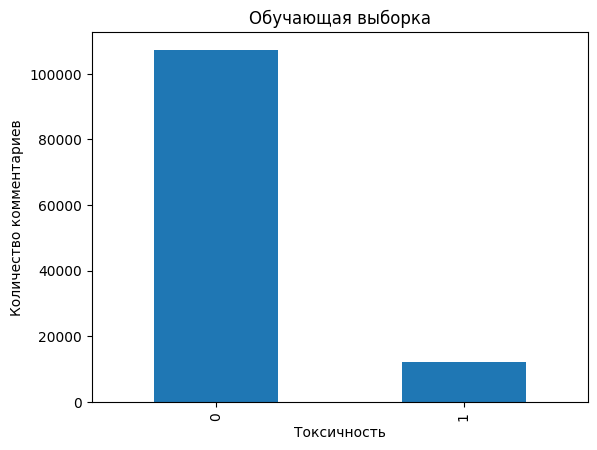

0    0.898384
1    0.101616
Name: toxic, dtype: float64


In [15]:
target_ratio(train, "Обучающая выборка")

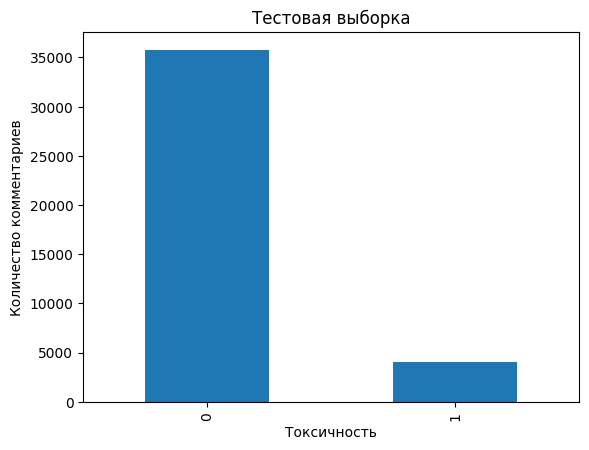

0    0.8984
1    0.1016
Name: toxic, dtype: float64


In [16]:
target_ratio(test, "Тестовая выборка")

На этом этапе можно удалить переменную `data`, дальше она нам не потребуется.

In [17]:
del data

#### Признаки и целевой признак

Применим величины TF-IDF как признаки.

In [18]:
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=list(stopwords))

Напишем функцию `target_features_split` для выделения признаков и целевого признаках в выборках.

In [19]:
def target_features_split(sample):
    target = sample['toxic']
    features = count_tf_idf.transform(sample['lemm_text'])
    return features, target

Запустим функцию `fit()` для `TfidfVectorizer()` для корпуса лемматизированных текстов на обучающей выборке, а затем применим функцию `target_features_split` для создания признаков и целевого признака в каждой выборке.

In [20]:
count_tf_idf.fit(train['lemm_text'])

features_train, target_train = target_features_split(train)
features_test, target_test = target_features_split(test)

Выведем на экран размеры выборок.

In [21]:
print(target_train.shape)
print(target_test.shape)

print(features_train.shape)
print(features_test.shape)

(119469,)
(39823,)
(119469, 135862)
(39823, 135862)


На данном этапы можем удалить переменные `train` и `test`, которые нам далее не потребуются.

In [22]:
del train
del test

### Модели

Подберем значения признаков и гиперпараметров для разных моделей. Рассмотрим следующие модели:
* Дерево решений (DecisionTreeClassifier)
* Случайный лес (RandomForestClassifier)
* Логистическая регрессия (LogisticRegression)

Учитывая дисбаланс, применим технику взвешивания классов. Для этого алгоритмах рассматриваемых моделей (дерева решений, случайного леса и логистической регрессии) в библиотеке `sklearn` есть аргумент `class_weight`. Укажем `class_weight='balanced'` (англ. «сбалансированный»).

Создадим пустые списки, куда будем добавлять значения для будущей сравнительной таблицы.

In [23]:
best_params = []
best_f1 = []

Напишем функцию, которая вернет результат обучения `GridSearchCV`.

In [24]:
def cv_estimator(model, params):
    model = model
    params = params
    grid = GridSearchCV(model, params, scoring='f1', n_jobs=-1)
    grid.fit(features_train, target_train)
    best_params.append(grid.best_params_)
    best_f1.append(grid.best_score_)
    return grid

#### Дерево решений

In [25]:
grid_dt = cv_estimator(DecisionTreeClassifier(random_state=12345, class_weight='balanced'),
                      {'max_depth': range(1, 6), 'min_samples_leaf': range(1, 6)})

In [26]:
grid_dt.best_score_

0.4829873709356477

In [27]:
grid_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

#### Случайный лес

In [ ]:
grid_rf = cv_estimator(RandomForestClassifier(random_state=12345, class_weight='balanced'),
    {'max_depth': [None] + [i for i in range(2, 5)],'n_estimators': [100, 200, 300]})

In [ ]:
grid_rf.best_score_

In [ ]:
grid_rf.best_params_

#### Логистическая регрессия

**Примечание**. Применить функцию удалось только со значением `solver= 'liblinear'`, с остальными выдавалась ошибка об исчерпании максимального числа итераций ("ConvergenceWarning: The max_iter was reached which means the coef_ did not converge") вне зависимости от заданного максимального числа итераций.

In [31]:
grid_lr = cv_estimator(LogisticRegression(random_state=12345, class_weight = 'balanced'),
                      {'C': [0.01, 0.1, 1, 10], 
                       'penalty': ['l1', 'l2'],
                       'solver': ['liblinear']})

In [32]:
grid_lr.best_score_

0.7600380698828774

In [33]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Обобщим результаты в таблице

In [34]:
models_compared = pd.DataFrame(
    {
        'model':['DecisionTreeClassifier',
                  'RandomForestClassifier',
                  'LogisticRegression'],
        'best_params': best_params,
        'F1': best_f1
    }
)

models_compared

,model,best_params,F1
0,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 5}",0.482987
1,RandomForestClassifier,"{'max_depth': None, 'n_estimators': 200}",0.609697
2,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.760038


### Тестирование лучшей модели

Проверим работу лучшей модели на тестовой выборке. При `refit=True` модель обучается на лучших параметрах на всем датасете. Таким образом, лучшая модель (`LogisticRegression` с гиперпараметрами `C:10, solver:'liblinear', penalty:'l2'`) уже обучена (метод `.predict()` у грида автоматически вызывает его у атрибута `.best_estimator_`). Сделаем предсказание на тестовой выборке и определим значение F1-меры.

In [35]:
predictions_test = grid_lr.predict(features_test)
f1 = f1_score(target_test, predictions_test)
print("Значение F1 наилучшей модели на тестовой выборке:", f1)

Значение F1 наилучшей модели на тестовой выборке: 0.7611289582377238


Проверим результат, обучив модель с лучшими параметрами.

In [36]:
grid_lr.best_estimator_

LogisticRegression(C=10, class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [37]:
model_lr = LogisticRegression(C=10, 
                              class_weight='balanced',
                              random_state=12345,
                              solver='liblinear')
model_lr.fit(features_train, target_train)
predictions_model_test = model_lr.predict(features_test)
f1_model = f1_score(target_test, predictions_model_test)
print("Значение F1 на валидационной выборке:", f1_model)   

Значение F1 на валидационной выборке: 0.7611289582377238


Качество модели подтверждается. При проверке на тестовой выборке значение F1-меры удовлетворяет условию – оказывается выше порогового значения 0.75.

Для константной модели значение F1-меры равно 0.

In [38]:
model_dummy = DummyClassifier()
model_dummy.fit(features_train, target_train)
predictions_dummy = model_dummy.predict(features_test)
f1_dummy = f1_score(target_test, predictions_dummy)
print("Значение F1 на константной модели =", f1_dummy)

Значение F1 на константной модели = 0.0


**Вывод по шагу 2**
1. Были рассмотрены следующие модели классификации: `Дерево решений (DecisionTreeClassifier)`, `Случайный лес (RandomForestClassifier)`, `Логистическая регрессия (LogisticRegression)`.
2. Лучший результат на кросс-валидации показала модель `LogisticRegression` с гиперпараметрами `C:10, solver:'liblinear'`. Значение F1-меры для этой модели оказалось выше порогового значения 0.75.
3. Качество модели было проверено на тестовой выборке. Значение F1-меры также выше порогового значения 0.75 и близко к лучшему значению на кросс-валидации.

## Выводы

На основании имеющихся в рапоряжении данных о токсичности правок для интернет-магазина «Викишоп» была построена модель для определения токсичности комментариев. Этот инструмент позволит искать токсичные комментарии и отправлять их на модерацию В ходе работы были выполнены следующие действия:

* данные загружены и подготовлены: при анализе обнаружен дисбаланс классов, проведена лемматизация и очистка текстов;
* модели обучены:
    * подготовлены выборки для обучения моделей: данные разделены на выборки, величины TF-IDF применены как признаки
    * обучены модели: `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression`, для каждой на кросс-валидации подобраны гиперпараметры для определения лучшей модели; для борьбы с дисбалансом использована техника взвешивания классов;
    * в соответствии с заданным критерием (значение F1 не меньше 0.75) выбрана лучшая модель, проверено её качество на тестовой выборке.

**Общий вывод**: 
Наилучший результат (метрика F1) показывает модель `LogisticRegression` с гиперпараметрами `C:10, solver:'liblinear'`. Значение F1-меры на кросс-валидации и при проверке на тестовой выборке выше порогового значения 0.75.